In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("developer_productivity_dataset_enriched.csv")

In [3]:
df

,Developer_ID,Experience,Commits,Bugs_Resolved,Productivity_Score,Working_Hours_Per_Week,Meetings_Per_Week,Code_Review_Count,Training_Hours,Team_Size,Remote_Work_Yes,Programming_Language_Go,Programming_Language_Java,Programming_Language_JavaScript,Programming_Language_Python
0,Dev000,7,61,11,92.56,34,12,2,20,11,1,0,1,0,0
1,Dev001,4,82,45,65.85,42,10,12,4,14,1,1,0,0,0
2,Dev002,8,97,37,58.47,33,2,27,9,12,1,0,0,0,0
3,Dev003,5,111,44,77.84,45,0,19,9,10,1,0,1,0,0
4,Dev004,7,86,43,96.81,53,3,27,18,11,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dev095,10,196,35,52.27,59,10,4,11,6,1,0,0,1,0
96,Dev096,9,139,39,68.73,49,9,37,13,7,1,0,1,0,0
97,Dev097,7,196,37,81.29,45,9,2,1,6,0,1,0,0,0
98,Dev098,9,197,25,75.16,54,2,22,16,7,1,0,0,0,1


In [4]:
print("Columns in dataset:", df.columns)
print(df.dtypes)


Columns in dataset: Index(['Developer_ID', 'Experience', 'Commits', 'Bugs_Resolved',
       'Productivity_Score', 'Working_Hours_Per_Week', 'Meetings_Per_Week',
       'Code_Review_Count', 'Training_Hours', 'Team_Size', 'Remote_Work_Yes',
       'Programming_Language_Go', 'Programming_Language_Java',
       'Programming_Language_JavaScript', 'Programming_Language_Python'],
      dtype='object')
Developer_ID                        object
Experience                           int64
Commits                              int64
Bugs_Resolved                        int64
Productivity_Score                 float64
Working_Hours_Per_Week               int64
Meetings_Per_Week                    int64
Code_Review_Count                    int64
Training_Hours                       int64
Team_Size                            int64
Remote_Work_Yes                      int64
Programming_Language_Go              int64
Programming_Language_Java            int64
Programming_Language_JavaScript      int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
Developer_ID                       100 non-null object
Experience                         100 non-null int64
Commits                            100 non-null int64
Bugs_Resolved                      100 non-null int64
Productivity_Score                 100 non-null float64
Working_Hours_Per_Week             100 non-null int64
Meetings_Per_Week                  100 non-null int64
Code_Review_Count                  100 non-null int64
Training_Hours                     100 non-null int64
Team_Size                          100 non-null int64
Remote_Work_Yes                    100 non-null int64
Programming_Language_Go            100 non-null int64
Programming_Language_Java          100 non-null int64
Programming_Language_JavaScript    100 non-null int64
Programming_Language_Python        100 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.8+ KB


In [6]:
df = df.drop(columns=['Developer_ID'])

In [7]:
df

,Experience,Commits,Bugs_Resolved,Productivity_Score,Working_Hours_Per_Week,Meetings_Per_Week,Code_Review_Count,Training_Hours,Team_Size,Remote_Work_Yes,Programming_Language_Go,Programming_Language_Java,Programming_Language_JavaScript,Programming_Language_Python
0,7,61,11,92.56,34,12,2,20,11,1,0,1,0,0
1,4,82,45,65.85,42,10,12,4,14,1,1,0,0,0
2,8,97,37,58.47,33,2,27,9,12,1,0,0,0,0
3,5,111,44,77.84,45,0,19,9,10,1,0,1,0,0
4,7,86,43,96.81,53,3,27,18,11,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,196,35,52.27,59,10,4,11,6,1,0,0,1,0
96,9,139,39,68.73,49,9,37,13,7,1,0,1,0,0
97,7,196,37,81.29,45,9,2,1,6,0,1,0,0,0
98,9,197,25,75.16,54,2,22,16,7,1,0,0,0,1


In [8]:
X = df.drop("Productivity_Score", axis=1)
y = df["Productivity_Score"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.0018990108328597044
MSE: 289.3277281390001


In [13]:
importances = model.feature_importances_
feature_names = X.columns


In [14]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


Feature Importances:
                            Feature  Importance
2                     Bugs_Resolved    0.163855
3            Working_Hours_Per_Week    0.147519
4                 Meetings_Per_Week    0.122217
1                           Commits    0.117106
6                    Training_Hours    0.098258
5                 Code_Review_Count    0.091704
7                         Team_Size    0.084197
0                        Experience    0.078887
12      Programming_Language_Python    0.033234
10        Programming_Language_Java    0.025950
11  Programming_Language_JavaScript    0.015425
8                   Remote_Work_Yes    0.011291
9           Programming_Language_Go    0.010356


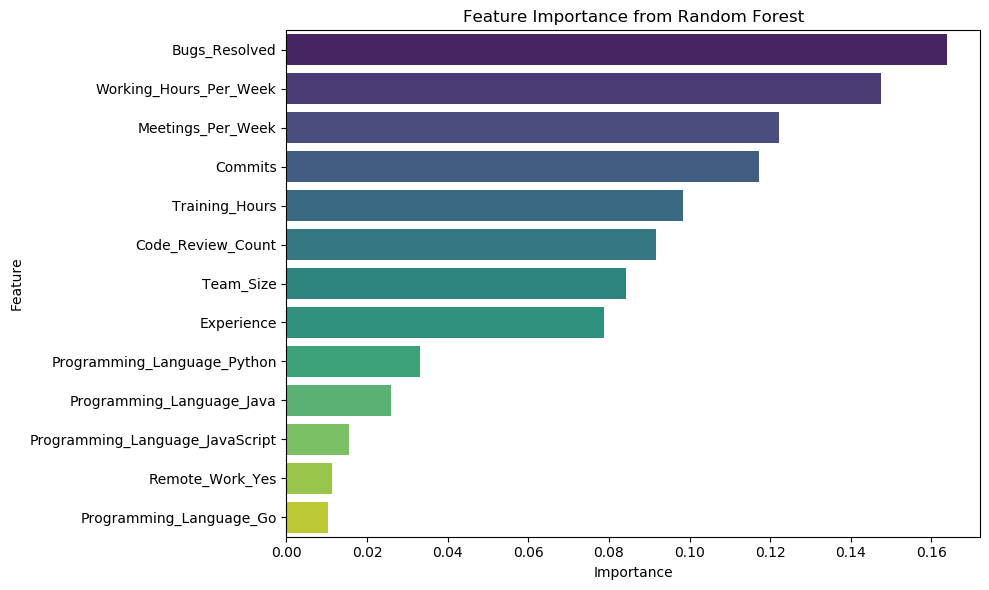

In [15]:
print("\nFeature Importances:")
print(importance_df)

# 11. Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()